# chapter03.판다스를 활용한 데이터 조사

In [1]:
!pip install pandas
!pip install seaborn

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("pima-indians-diabetes3.csv")
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(768, 9)

In [8]:
#Class Imbalance Problem (클래스 불균형 문제)
df["diabetes"].value_counts()
#0:정상인
#1:당뇨병 환자
#500/768*100=66.7%

#0인 클래스:1인 클래스 = 2:1 --->1:1
#방법 1) 500명 중에서 268명을 랜덤하게 추출 --> 268:268=1:1
#방법 2) 268명 --> 500명으로 늘리자!
#    ㄱ) 212명의 신규 환자에 대해 설문조사 실시 --> 500:500 =1:1 (비용과 시간 필요)
#    ㄴ) 데이터 증강!

,count
diabetes,
0,500
1,268


In [9]:
df.describe() #묘사하다, (기초 통계량) 기술하다

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#상관계수 --> correlation coefficient
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


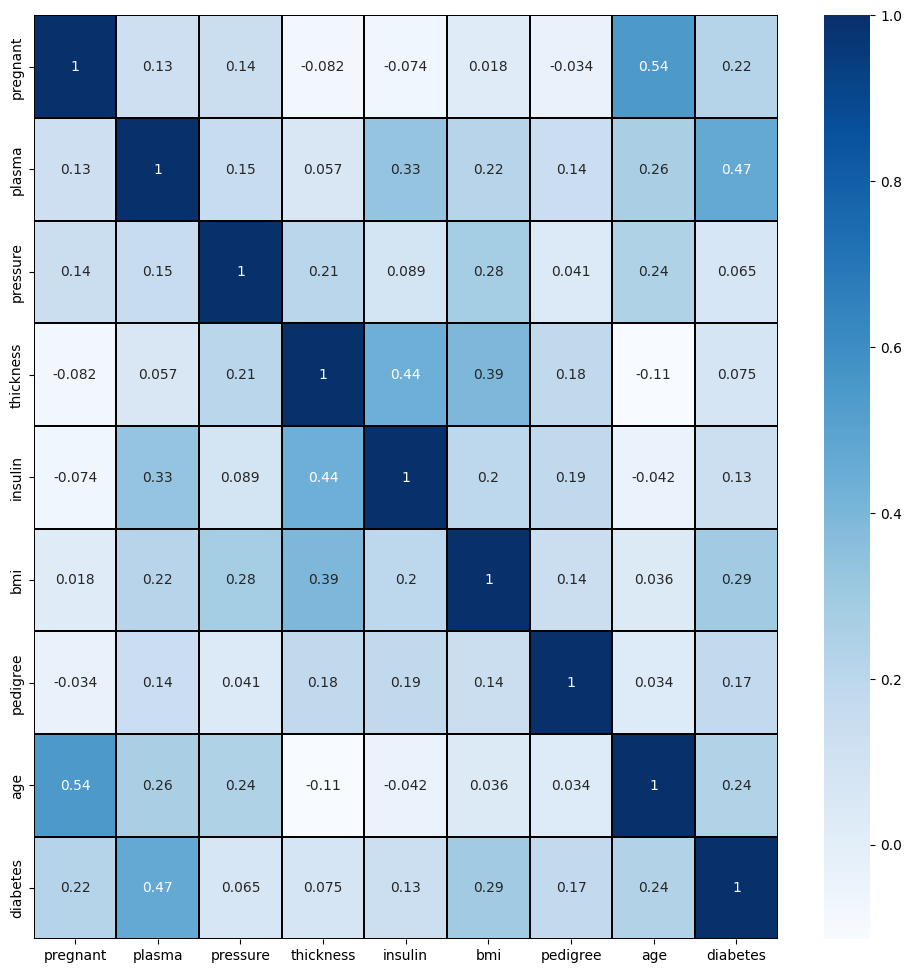

In [20]:
plt.figure(figsize=(12,12)) #가로: 12인치, 세로:12인치
#color map ->cmp
#annotation(n,주석)
sns.heatmap(data=df.corr(),cmap="Blues",annot=True,linewidths=0.1,linecolor="black")
plt.show()

In [26]:
df.head(3)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [25]:
df["plasma"]

,plasma
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


In [23]:
df.bmi.head(3)

,bmi
0,33.6
1,26.6
2,23.3


In [24]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [28]:
mask=df.diabetes==0 #정상인 -->True / 당뇨병 환자 --> False
df["plasma"][mask] #True였던 샘플만 추출!

,plasma
1,85
3,89
5,116
7,115
10,110
...,...
762,89
763,101
764,122
765,121


In [29]:
mask=df.diabetes==1 #정상인 -->False / 당뇨병 환자 --> True
df["plasma"][mask]

,plasma
0,148
2,183
4,137
6,78
8,197
...,...
755,128
757,123
759,190
761,170


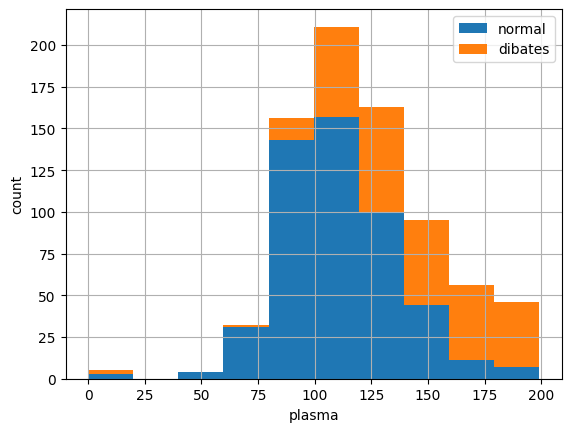

In [35]:
plt.figure()
plt.hist(x=[df["plasma"][df.diabetes==0],df["plasma"][df.diabetes==1]],bins=10,histtype="barstacked",label=["normal","dibates"])
plt.legend()
plt.grid()
plt.xlabel("plasma")
plt.ylabel("count")
plt.show()

#chapter 05.피마 인디언의 당뇨병 예측 실행

In [36]:
df.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [37]:
x=df(["pregnant","plasma","pressure","thickness","insulin","bmi","pedigree","age"])

TypeError: 'DataFrame' object is not callable

In [41]:
from tensorflow import keras
from keras import Sequential,Input
from keras.layers import Dense

model=Sequential()
model.add(Input(shape=(8,))) #입력층
model.add(Dense(units=12,activation="relu")) #은닉층 1
model.add(Dense(units=8,activation="relu")) #은닉층 2
model.add(Dense(units=1,activation="sigmoid")) #출력층

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)